# 서울시 생활정보 기반 대중교통 수요 분석 (2)

* 데이터간 관계 가설 수립 및 검증
    - 5-1 데이터 분석 (인구 기반 대중교통 수요)
    - 5-2 데이터 분석 (상권 기반 대중교통 수요)

In [1]:
# 분석
import pandas as pd
import numpy as np
import scipy.stats as spst

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc("font", family="Malgun Gothic")
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False}, style='white')

In [2]:
local_bus = pd.read_csv('dataA.csv')
seoul_moving = pd.read_csv('dataB.csv')
gu_people = pd.read_csv('dataC.csv')
business = pd.read_csv('dataD.csv')

In [3]:
sns.set_palette('coolwarm', local_bus['지역구'].nunique())

In [3]:
display(local_bus.head())
display(seoul_moving.head())
display(gu_people.head())
display(business.head())

,지역구,정류장수,노선수,총승차승객수,총하차승객수,평균승차승객수,평균하차승객수
0,강남구,499,91,8030483,7569213,128.8,121.4
1,강동구,373,21,2894675,2840350,98.8,97.0
2,강북구,413,67,4825181,4671783,133.0,128.8
3,강서구,566,49,4681083,4652828,88.1,87.6
4,관악구,466,86,7655819,7792476,154.8,157.5


,대상연월,요일,도착시간,성별,나이,이동유형,평균 이동 시간(분),이동인구(합),출발시군구,도착시군구
0,202204,일,0,F,0,EE,10,28.02,종로구,종로구
1,202204,일,0,F,0,EH,10,27.52,종로구,종로구
2,202204,일,0,F,0,HE,10,27.83,종로구,종로구
3,202204,일,0,F,10,HW,10,6.05,종로구,종로구
4,202204,일,0,F,10,EH,90,5.95,종로구,종로구


,지역구,세대당인구,세대수(세대),총 한국인,한국인 남,한국인 여,총 외국인,외국인 남,외국인 여,총계,총 남자,총 여자,65세이상
0,강남구,2.27,234612,532577,254866,277711,4761,2230,2531,537338,257096,280242,79575
1,강동구,2.28,201926,461300,226203,235097,3797,1688,2109,465097,227891,237206,75477
2,강북구,2.05,144725,297384,144643,152741,3440,1291,2149,300824,145934,154890,64961
3,강서구,2.10,272572,573046,275422,297624,5380,2375,3005,578426,277797,300629,93924
4,관악구,1.74,279353,486375,244409,241966,13961,6041,7920,500336,250450,249886,80686


,지역구,택시운송업 사업체갯수,택시운송업 종사자수,일반한식점 사업체갯수,일반한식점 종사자수,화물운송업 사업체갯수,화물운송업 종사자수,부동산업 사업체갯수,부동산업 종사자수,두발미용업 사업체갯수,...,커피전문점 사업체갯수,커피전문점 종사자수,기타 주점업 사업체갯수,기타 주점업 종사자수,의류업 사업체갯수,의류업 종사자수,학원 사업체갯수,학원 종사자수,한식육류전문 사업체갯수,한식육류전문 종사자수
0,강남구,1036,1668,2749,9666,1013,1017,3251,7080,1406,...,1789,6265,825,1819,589,9515,1859,11244,822,4145
1,강동구,2580,3836,1150,2759,1677,1677,1324,1651,933,...,686,1787,538,794,110,1317,827,2728,419,1144
2,강북구,1578,2245,1017,2192,988,988,641,810,680,...,443,1095,542,796,57,104,300,754,333,949
3,강서구,3679,6180,1430,3801,2827,2853,1548,2454,1072,...,906,2728,754,1184,118,749,846,2303,594,1812
4,관악구,2059,2653,1327,3068,1648,1656,1112,1817,898,...,702,1952,624,1107,75,276,452,1422,425,1315


## A> 인구 분포와 유동 인구가 큰 곳을 중점으로 버스 정류장/노선을 증설해야 한다.

### A-1> 상관관계 분석1
* 인구 분포와 정류장 수는 연관이 있다/없다.
* 인구 분포와 노선 수는 연관이 있다/없다.

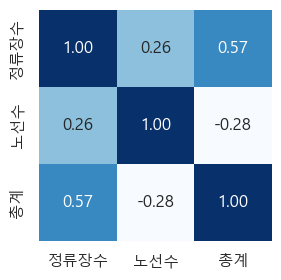

In [30]:
lb_gp_cut = pd.merge(local_bus[['지역구', '정류장수', '노선수']], gu_people[['지역구', '총계']], how='inner', on='지역구')
plt.figure(figsize=(3,3))
sns.heatmap(data=lb_gp_cut.corr(method='pearson', numeric_only=True),
            annot=True,
            fmt='.2f',
            cmap='Blues',
            cbar=False)
plt.show()

In [32]:
result1 = spst.pearsonr(lb_gp_cut['총계'], lb_gp_cut['정류장수'])
print("인구 분포와 정류장 수 상관관계: %.2f, pv: %.3f" % (result1[0], result1[1]))

result2 = spst.pearsonr(lb_gp_cut['총계'], lb_gp_cut['노선수'])
print("인구 분포와 노선 수 상관관계: %.2f, pv: %.3f" % (result2[0], result2[1]))

인구 분포와 정류장 수 상관관계: 0.57, pv: 0.003
인구 분포와 노선 수 상관관계: -0.28, pv: 0.172


**인사이트**
* 인구 분포와 정류장 수는 중간 정도의 양의 상관관계가 있다. -> 인구 분포만큼 정류장 수가 어느정도 있다.
* 노선 수는 약한 음의 상관관계를 보이나, 유의수준 5%에서 기각한다.

### A-2> 분석1 - 지역구별 인구와 버스 사용 인원
* 1 . 지역구별 인구대비 버스 사용 인원과 버스 비교 (상관관계 분석 결과를 토대로 정류장 수 우선 기준)
* 2 . 사용 인원은 많은데 버스는 적은 지역 상위 5개 선정
* 3 . 5개 지역구에 대해서 노선/좌표/동 등 신설 필요 위치 선정

In [4]:
# 1. 지역구별 인구대비 버스 사용 인원과 버스 비교
lb_gp = pd.merge(local_bus, gu_people, how='inner', on='지역구')
lb_gp['정류장/노선'] = round(lb_gp['정류장수'] / lb_gp['노선수'], 4) # 노선 하나가 지역구 내에서 지나는 평균 정류장 수
lb_gp['버스사용비율'] = round((lb_gp['총승차승객수'] + lb_gp['총하차승객수']) / lb_gp['총계'], 3) # 지역구 인구 대비 버스 사용인원

In [6]:
# 2-A. 사용 인원은 많은데 버스는 적은 지역
lb_gp['버스별수용비율A'] = round(lb_gp['버스사용비율'] / lb_gp['정류장수'], 4)
lb_gp['버스별수용비율B'] = round(lb_gp['버스사용비율'] / lb_gp['정류장/노선'], 3) # 높을수록 사용인원은 많은데 정류장이나 노선수는 적음
lb_gp2 = lb_gp[['지역구', '버스사용비율', '정류장수', '버스별수용비율A', '정류장/노선', '버스별수용비율B']]

bus_accm_A = lb_gp2.sort_values(by='버스별수용비율A', ascending=False, ignore_index=True)
bus_accm_B = lb_gp2.sort_values(by='버스별수용비율B', ascending=False, ignore_index=True)
bus_accms = pd.concat([bus_accm_A[['지역구', '버스별수용비율A']], bus_accm_B[['지역구', '버스별수용비율B']]], axis=1)
bus_accms.head()

,지역구,버스별수용비율A,지역구,버스별수용비율B
0,중구,0.3152,중구,32.467
1,종로구,0.1985,종로구,21.038
2,용산구,0.1083,서대문구,8.617
3,동대문구,0.0960,용산구,7.259
4,금천구,0.0871,동대문구,7.007


**중구, 종로구, 용산, 동대문구, 금천구**
* 기준 A에 대해 금천구를 제외한 상위 5개 지역구가 모두 기준 B에도 나타나므로 그대로 선정한다.

### A-3> 상관관계 분석2
* 유동 인구와 정류장 수는 연관이 있다/없다.
* 유동 인구와 노선 수는 연관이 있다/없다.

In [7]:
sm = seoul_moving[['평균 이동 시간(분)', '이동인구(합)', '출발시군구', '도착시군구']].copy()
sm['시간x인구'] = sm['평균 이동 시간(분)'] * sm['이동인구(합)'] # 이동 시간이 길수록 더 버스가 필요하기 때문.

sm_leave = sm.groupby('출발시군구')['시간x인구'].sum().to_frame().reset_index().sort_values(by='시간x인구', ascending=False).reset_index(drop=True)
sm_arrive = sm.groupby('도착시군구')['시간x인구'].sum().to_frame().reset_index().sort_values(by='시간x인구', ascending=False).reset_index(drop=True)

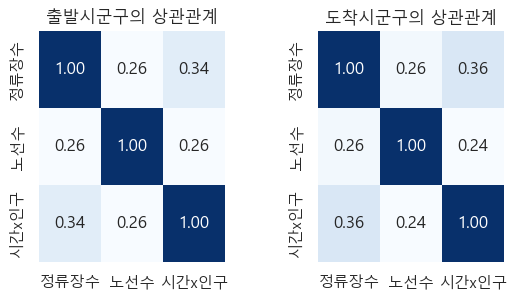

In [19]:
lb_smle_cut = pd.merge(local_bus[['지역구', '정류장수', '노선수']], sm_leave, how='inner', left_on='지역구', right_on='출발시군구')
lb_smar_cut = pd.merge(local_bus[['지역구', '정류장수', '노선수']], sm_arrive, how='inner', left_on='지역구', right_on='도착시군구')

plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
sns.heatmap(data=lb_smle_cut.corr(method='pearson', numeric_only=True),
            annot=True,
            fmt='.2f',
            cmap='Blues',
            cbar=False)
plt.title("출발시군구의 상관관계")

plt.subplot(1, 2, 2)
sns.heatmap(data=lb_smar_cut.corr(method='pearson', numeric_only=True),
            annot=True,
            fmt='.2f',
            cmap='Blues',
            cbar=False)
plt.title("도착시군구의 상관관계")

plt.subplots_adjust(wspace=0.5)
plt.show()

In [20]:
result1 = spst.pearsonr(lb_smle_cut['시간x인구'], lb_smle_cut['정류장수'])
print("유동인구와 정류장 수 상관관계: %.2f, pv: %.3f" % (result1[0], result1[1]))

result2 = spst.pearsonr(lb_smle_cut['시간x인구'], lb_smle_cut['노선수'])
print("유동인구와 노선 수 상관관계: %.2f, pv: %.3f" % (result2[0], result2[1]))

유동인구와 정류장 수 상관관계: 0.34, pv: 0.097
유동인구와 노선 수 상관관계: 0.26, pv: 0.214


**인사이트**
* 유동인구와 정류장/노선 수가 약한 양의 상관관계를 보이나, 유의수준 5%에서 기각한다.

### A-4> 분석2 - 지역구별 유동인구와 버스 정류장 수

In [7]:
# 2-B. 유동 인구에 비해 평균 정류장 수가 적은 지역
sm_leave['rank_leave'] = sm_leave['시간x인구'].rank(method='min', ascending=False).astype(int)
sm_arrive['rank_arrive'] = sm_leave['시간x인구'].rank(method='min', ascending=False).astype(int)

display(sm_leave.head())
display(sm_arrive.head())

,출발시군구,시간x인구,rank_leave
0,강남구,769911069.5,1
1,송파구,585355634.5,2
2,서초구,488890057.2,3
3,영등포구,420909981.7,4
4,마포구,400101669.6,5


,도착시군구,시간x인구,rank_arrive
0,강남구,751345976.5,1
1,송파구,588565446.9,2
2,서초구,484401703.3,3
3,영등포구,415297337.3,4
4,마포구,397434987.2,5


In [13]:
bus_leaves = pd.merge(lb_gp[['지역구', '정류장/노선']], sm_leave, how='inner', left_on='지역구', right_on='출발시군구')
bus_leaves.drop(columns='지역구', axis=1, inplace=True)
bus_leaves['유동인구/평균정류장'] = (bus_leaves['시간x인구'] / bus_leaves['정류장/노선']).round(2)
bus_leaves.sort_values(by='유동인구/평균정류장', ascending=False, ignore_index=True, inplace=True)

bus_arrives = pd.merge(lb_gp[['지역구', '정류장/노선']], sm_arrive, how='inner', left_on='지역구', right_on='도착시군구')
bus_arrives.drop(columns='지역구', axis=1, inplace=True)
bus_arrives['유동인구/평균정류장'] = (bus_arrives['시간x인구'] / bus_arrives['정류장/노선']).round(2)
bus_arrives.sort_values(by='유동인구/평균정류장', ascending=False, ignore_index=True, inplace=True)

display(bus_leaves.head())
display(bus_arrives.head())

,정류장/노선,출발시군구,시간x인구,rank_leave,유동인구/평균정류장
0,1.7282,중구,350060745.8,7,2.025580e+08
1,5.4835,강남구,769911069.5,1,1.404050e+08
2,3.3019,종로구,341321568.8,9,1.033713e+08
3,4.6400,영등포구,420909981.7,4,9.071336e+07
4,7.5636,송파구,585355634.5,2,7.739114e+07


,정류장/노선,도착시군구,시간x인구,rank_arrive,유동인구/평균정류장
0,1.7282,중구,337272908.0,8,1.951585e+08
1,5.4835,강남구,751345976.5,1,1.370194e+08
2,3.3019,종로구,328782951.6,11,9.957387e+07
3,4.6400,영등포구,415297337.3,4,8.950374e+07
4,7.5636,송파구,588565446.9,2,7.781552e+07


**중구, 강남구, 종로구, 영등포구, 송파구**
* 지역구의 평균 정류장 수는 적고 유동인구는 많은 상위 5개 지역구

## B> 상권이 큰 곳을 중점으로 버스 정류장을 증설해야 한다.